In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# XOR Problem

## What is the XOR operation?

* XOR is a boolean logic operation that compares two input bits and generates one output bit. 
* IF the bits are the same (or both are true) the result is 0 (or false).
* IF the bits are different the result is 1 (or true).

## What is the XOR problem?

* The XOR can be seen as a classification problem. 
*   You receive two inputs and you want to predict true or false, depending if the inputs are different or the same
* However, the inputs are not linearly separable. That means that there is no way to use a straight line to separate the possible options an make an automated prediction correctly.
* In the next figure we can se that it is not possible to separate the red dots and the green dots with a straight line. 

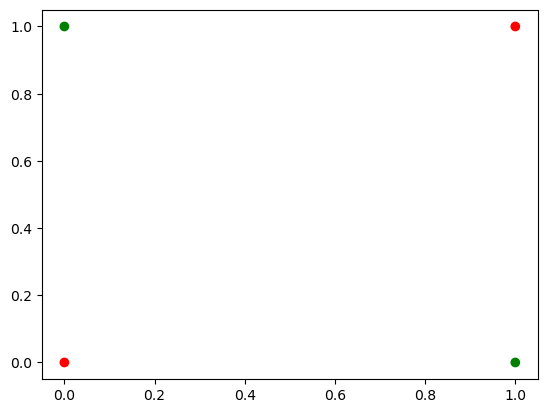

In [4]:
plt.scatter([0, 0, 1, 1], [0,1,1,0], c=['red', 'green', 'red', 'green'])
plt.show()

# Using a Multilayer Perceptron (MLP) architecture

* A MLP with an input and an output layer is not capable of solving the problem since it the result are linear solutions.
* However, if we add a hidden layer to the MLP, the network will be capable of achieving non-linear separation and correctly predict the results.

#  Training a MLP with a single hidden layer to solve the XOR problem


In [6]:
# First we define the input data (X) and the output data (Y) that we are going to use for training
X = [[0,0], [0,1], [1,0], [1,1]]
Y = [[0],[1],[1],[0]]

In [10]:
# Here we define the architecture of our network. 
#   The number of neurons in the input layer is defined by the number of input values in our dataset, in this case 2. 
#   For this architecture we are going to use 2 neurons in our hidden layer.
#   The number of neurons in the output layer is defined by the number of expected values, in this case we expect a single value 1 or 0.
model =  tf.keras.models.Sequential() # we create a Neural Network model that is Sequential, which means each layer we add will be connected to the previous one. 
model.add(tf.keras.Input(shape=(2,))) # Input layer
model.add(tf.keras.layers.Dense(2, activation='sigmoid')) # Hidden Layer
model.add(tf.keras.layers.Dense(1, activation='sigmoid')) # Output Layer

2024-11-11 20:57:00.799102: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [12]:
# We define which optimizer and which error loss are we using to update the weights of the network.
sgd = tf.keras.optimizers.SGD(learning_rate=0.8,momentum=0.3)
mse = tf.keras.losses.MeanSquaredError()

In [14]:
# we compile our model 
model.compile(optimizer=sgd, loss=mse, metrics=['accuracy'])

In [16]:
print (X)
print (Y)

[[0, 0], [0, 1], [1, 0], [1, 1]]
[[0], [1], [1], [0]]


In [20]:
# After compiling the model we are able to start the training using the 'fit' function. 
# We need to make use of our training dataset (X and Y).
# We also specify the number of epochs (or iterations) the network is going to train for.
model.fit(X, Y, epochs=1000)

# from keras.models import Sequential
# from keras.layers import Dense

# # Define a simple Sequential model for demonstration
# model = Sequential()
# model.add(Dense(4, input_shape=(2,), activation='relu'))  # Input shape matches your data (2 features)
# model.add(Dense(1, activation='sigmoid'))

# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


# import numpy as np


# X = [[0, 0], [0, 1], [1, 0], [1, 1]]
# Y = [[0], [1], [1], [0]]


# X = np.array(X)
# Y = np.array(Y)


# model.fit(X, Y, epochs=1000)


ValueError: Unrecognized data type: x=[[0, 0], [0, 1], [1, 0], [1, 1]] (of type <class 'list'>)

###### After our model finished training we can test it and see how well it predicts 
model.predict(X)